# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

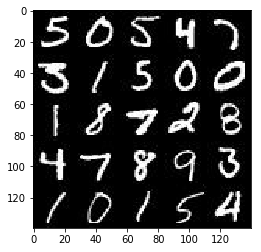

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

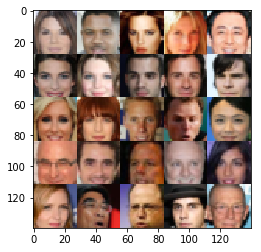

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    real_inputs_ph = tf.placeholder(tf.float32,
                                 shape=(None, image_width, image_height, image_channels),
                                 name='real_inputs_ph')
    
    
    z_inputs_ph = tf.placeholder(tf.float32,
                                 (None, z_dim),
                                 name='z_inputs_ph')
    
    learning_rate_ph = tf.placeholder(tf.float32,
                                   name='learning_rate_ph')

    return real_inputs_ph, z_inputs_ph, learning_rate_ph


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    _discriminator_alpha = 0.2
    _conv_init_size = 64
    _2_times_conv_init_size = 2*_conv_init_size
    _4_times_conv_init_size = 4*_conv_init_size
    _8_times_conv_init_size = 8*_conv_init_size

    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        ########################### 1st ############################
        _1st_conv = tf.layers.conv2d(images, 
                                     _conv_init_size, 
                                     5, 2, 'SAME')
        _1st_leaky_relu = tf.maximum(_discriminator_alpha * _1st_conv, 
                                     _1st_conv)
        
        
        ########################### 2nd ############################
        _2nd_conv = tf.layers.conv2d(_1st_leaky_relu, 
                                     _2_times_conv_init_size,
                                     5, 2, 'SAME')
        _2nd_batch_norm = tf.layers.batch_normalization(_2nd_conv, 
                                                        training=True)
        _2nd_leaky_relu = tf.maximum(_discriminator_alpha * _2nd_batch_norm,
                                     _2nd_batch_norm)
        
        
        
        ########################### 3rd ############################
        _3rd_conv = tf.layers.conv2d(_2nd_leaky_relu, 
                                     _4_times_conv_init_size, 
                                     5, 1, 'SAME')
        _3rd_batch_norm = tf.layers.batch_normalization(_3rd_conv, 
                                                        training=True)
        _3rd_leaky_relu = tf.maximum(_discriminator_alpha * _3rd_batch_norm, 
                                     _3rd_batch_norm)
        
        
        
        ########################### 4th ############################
        _4th_conv = tf.layers.conv2d(_3rd_leaky_relu, 
                                     _8_times_conv_init_size, 
                                     5, 1, 'SAME')
        _4th_batch_norm = tf.layers.batch_normalization(_4th_conv, 
                                                        training=True)
        _4th_leaky_relu = tf.maximum(_discriminator_alpha * _4th_batch_norm,
                                     _4th_batch_norm)
        
        
        ########################### flatten ############################
        _flat_4th_leaky_relu = tf.reshape(_4th_leaky_relu, (-1, 7*7*_8_times_conv_init_size))
        
        ########################## fully connected dense ###############
        _discriminator_logits = tf.layers.dense(_flat_4th_leaky_relu, 1)
        
        ########################## segmoid logits ###############
        _discriminator_output = tf.sigmoid(_discriminator_logits)
        
        return _discriminator_output, _discriminator_logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    _generator_alpha = 0.2
    
    _conv_init_size = 64
    _2_times_conv_init_size = 2*_conv_init_size
    _4_times_conv_init_size = 4*_conv_init_size
    _8_times_conv_init_size = 8*_conv_init_size
    
    with tf.variable_scope('generator', reuse= not is_train):
        
        ########################### 1st ############################
        _1st_dense = tf.layers.dense(z,
                                     7*7*_8_times_conv_init_size)
        _1st_dense_flatten = tf.reshape(_1st_dense,
                                        (-1, 7, 7, _8_times_conv_init_size))
        _1st_out = tf.maximum(_generator_alpha*_1st_dense_flatten,
                              _1st_dense_flatten)
        
        
        ########################### 2nd ############################
        _2nd_conv = tf.layers.conv2d_transpose(_1st_out, 
                                             _4_times_conv_init_size,
                                             3, 1, 'SAME')
        _2nd_batch_norm = tf.layers.batch_normalization(_2nd_conv, 
                                                        training=is_train)
        _2nd_leaky_relu = tf.maximum(_generator_alpha * _2nd_batch_norm, 
                                     _2nd_batch_norm)
        
        ########################### 3rd ############################
        _3rd_conv = tf.layers.conv2d_transpose(_2nd_leaky_relu, 
                                             _2_times_conv_init_size, 
                                             3, 1, 'SAME')
        _3rd_batch_norm = tf.layers.batch_normalization(_3rd_conv,
                                                    training=is_train)
        _3rd_leaky_relu = tf.maximum(_generator_alpha * _3rd_batch_norm, 
                                     _3rd_batch_norm)
        
        ########################### 4th ############################
        _4th_conv = tf.layers.conv2d_transpose(_3rd_leaky_relu,
                                               _conv_init_size,
                                               3, 2, 'SAME')
        _4th_batch_norm = tf.layers.batch_normalization(_4th_conv,
                                                    training=is_train)
        _4th_leaky_relu = tf.maximum(_generator_alpha * _4th_batch_norm,
                            _4th_batch_norm)
        
        ########################## logits ##########################
        _generator_logits = tf.layers.conv2d_transpose(_4th_leaky_relu,
                                            out_channel_dim,
                                            3, 2, 'SAME')
        
        ################### hyperbolic tangent logits ###############
        _generator_output = tf.tanh(_generator_logits)
        
        return _generator_output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    _generator_model = generator(input_z, out_channel_dim)
    _discriminator_real_model, _discriminator_real_logits = discriminator(input_real)
    _discriminator_fake_model, _discriminator_fake_logits = discriminator(_generator_model, reuse=True)
    
    _discriminator_real_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=_discriminator_real_logits, 
            labels=tf.ones_like(_discriminator_real_model) * 0.9))
    
    _discriminator_fake_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=_discriminator_fake_logits,
            labels=tf.zeros_like(_discriminator_fake_model)))
    
    _total_discriminator_loss = _discriminator_real_loss + _discriminator_fake_loss

    _total_generator_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=_discriminator_fake_logits,
            labels=tf.ones_like(_discriminator_fake_model)))
    
    return _total_discriminator_loss, _total_generator_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    _model_variables = tf.trainable_variables()
    _discriminator_variables = [variable for variable in _model_variables if variable.name.startswith('discriminator')]
    _generator_variables = [variable for variable in _model_variables if variable.name.startswith('generator')]

    ########################## optimizers ###############
    _discriminator_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=_discriminator_variables)
    _generator_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=_generator_variables)

    return _discriminator_opt, _generator_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    tf.reset_default_graph()
    
    _real_input, _z_input, _ = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    _discriminator_loss, _generator_loss = model_loss(_real_input, _z_input, data_shape[3])
    
    _discriminator_opt, _generator_opt = model_opt(_discriminator_loss, _generator_loss, learning_rate, beta1)
    
    steps = 0
    
    
    with tf.Session() as train_session:
        train_session.run(tf.global_variables_initializer())
        for epoch in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_images *= 2
                steps += 1
            
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                train_session.run(_discriminator_opt, feed_dict={_real_input: batch_images, _z_input: batch_z})
                train_session.run(_generator_opt, feed_dict={_z_input: batch_z})
                
                if steps % 100 == 0:
                    discriminator_loss = _discriminator_loss.eval({_z_input: batch_z, _real_input: batch_images})
                    generator_loss = _generator_loss.eval({_z_input: batch_z})

                    print("Epoch {}/{}...".format(steps, epoch_count))
                    print("==============Losses================")
                    print("Discriminator: {:.4f}".format(discriminator_loss))
                    print("Generator: {:.4f}".format(generator_loss))
                    
                    show_generator_output(train_session, 1, _z_input, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 100/2...
==============Losses================
Discriminator: 1.0414
Generator: 2.2602


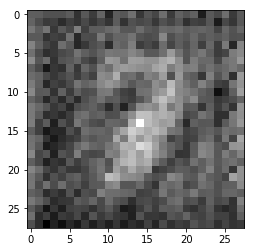

Epoch 200/2...
==============Losses================
Discriminator: 2.0474
Generator: 0.3322


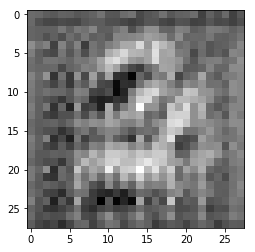

Epoch 300/2...
==============Losses================
Discriminator: 0.5503
Generator: 2.1335


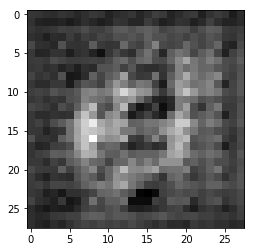

Epoch 400/2...
==============Losses================
Discriminator: 0.5059
Generator: 2.3768


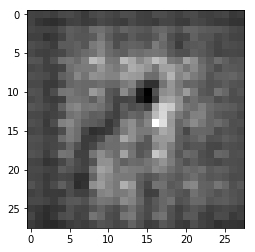

Epoch 500/2...
==============Losses================
Discriminator: 1.0299
Generator: 1.0690


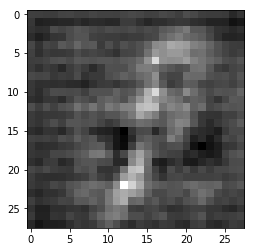

Epoch 600/2...
==============Losses================
Discriminator: 0.6367
Generator: 1.8405


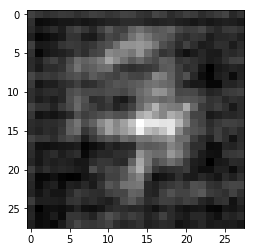

Epoch 700/2...
==============Losses================
Discriminator: 0.8153
Generator: 1.6899


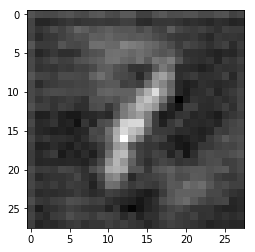

Epoch 800/2...
==============Losses================
Discriminator: 0.9683
Generator: 0.8815


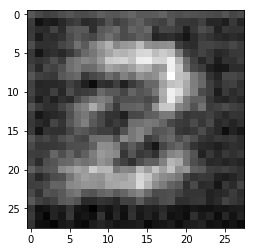

Epoch 900/2...
==============Losses================
Discriminator: 0.7353
Generator: 1.5335


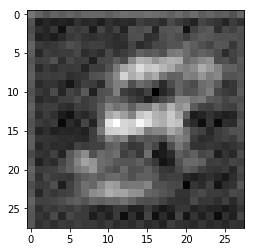

Epoch 1000/2...
==============Losses================
Discriminator: 0.9059
Generator: 2.0017


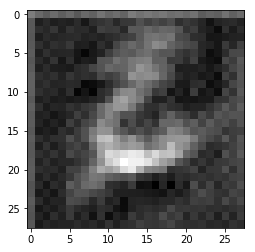

Epoch 1100/2...
==============Losses================
Discriminator: 0.5966
Generator: 1.9801


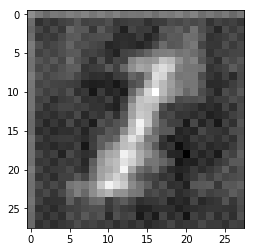

Epoch 1200/2...
==============Losses================
Discriminator: 0.8491
Generator: 1.1441


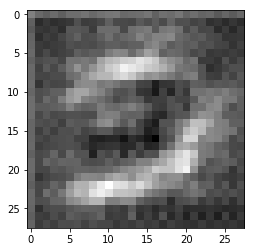

Epoch 1300/2...
==============Losses================
Discriminator: 0.7028
Generator: 2.2264


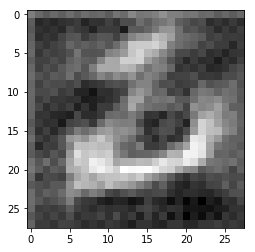

Epoch 1400/2...
==============Losses================
Discriminator: 0.6582
Generator: 1.6973


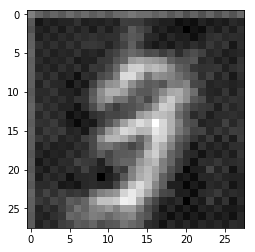

Epoch 1500/2...
==============Losses================
Discriminator: 0.9382
Generator: 0.9632


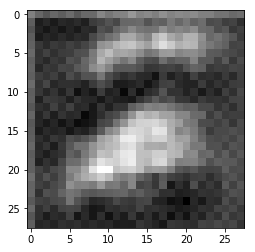

Epoch 1600/2...
==============Losses================
Discriminator: 0.7957
Generator: 1.5766


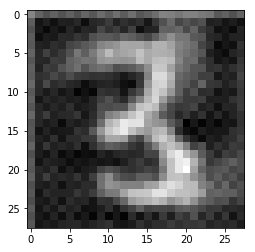

Epoch 1700/2...
==============Losses================
Discriminator: 0.6556
Generator: 1.5103


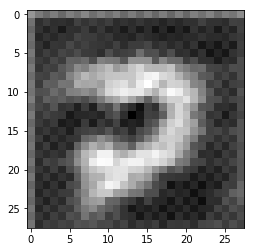

Epoch 1800/2...
==============Losses================
Discriminator: 0.7770
Generator: 1.7527


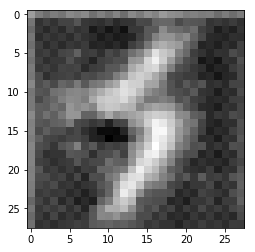

Epoch 1900/2...
==============Losses================
Discriminator: 1.6044
Generator: 4.7426


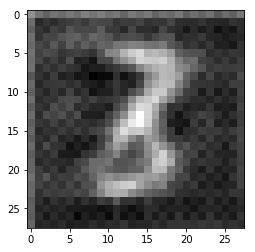

Epoch 2000/2...
==============Losses================
Discriminator: 1.6444
Generator: 5.1100


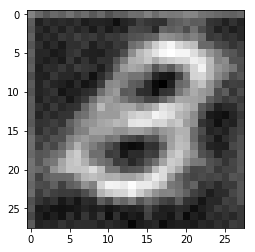

Epoch 2100/2...
==============Losses================
Discriminator: 0.8057
Generator: 1.2562


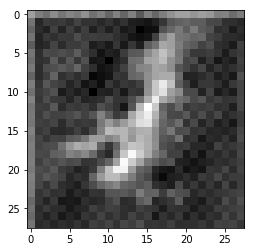

Epoch 2200/2...
==============Losses================
Discriminator: 0.8035
Generator: 1.3570


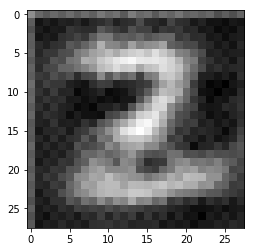

Epoch 2300/2...
==============Losses================
Discriminator: 4.0178
Generator: 0.0729


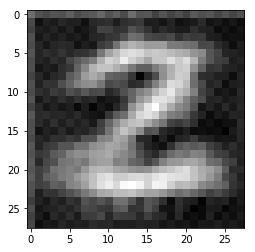

Epoch 2400/2...
==============Losses================
Discriminator: 0.8643
Generator: 1.3122


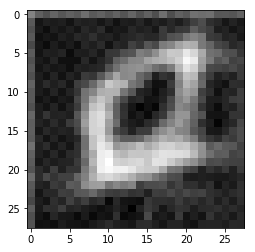

Epoch 2500/2...
==============Losses================
Discriminator: 1.0480
Generator: 0.7976


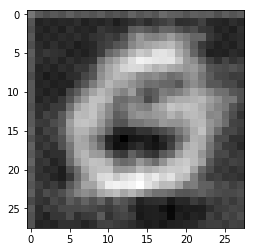

Epoch 2600/2...
==============Losses================
Discriminator: 0.7708
Generator: 1.2872


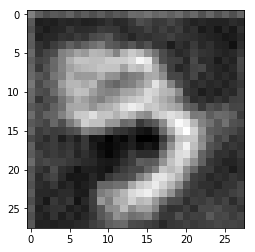

Epoch 2700/2...
==============Losses================
Discriminator: 0.8433
Generator: 1.0411


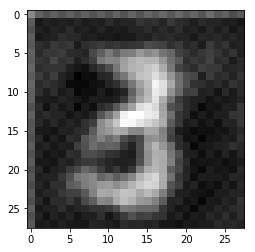

Epoch 2800/2...
==============Losses================
Discriminator: 0.9691
Generator: 1.4935


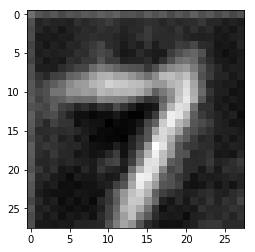

Epoch 2900/2...
==============Losses================
Discriminator: 0.8341
Generator: 1.2706


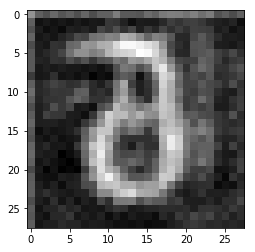

Epoch 3000/2...
==============Losses================
Discriminator: 2.3618
Generator: 0.5717


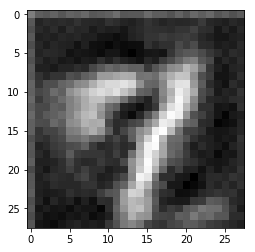

Epoch 3100/2...
==============Losses================
Discriminator: 0.8807
Generator: 1.1600


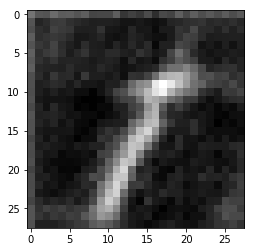

Epoch 3200/2...
==============Losses================
Discriminator: 0.9818
Generator: 1.1118


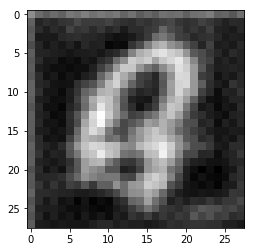

Epoch 3300/2...
==============Losses================
Discriminator: 0.8486
Generator: 2.0129


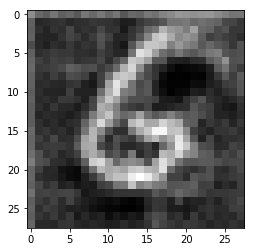

Epoch 3400/2...
==============Losses================
Discriminator: 1.8706
Generator: 0.3476


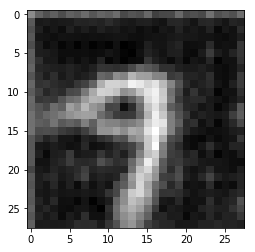

Epoch 3500/2...
==============Losses================
Discriminator: 2.1346
Generator: 0.5024


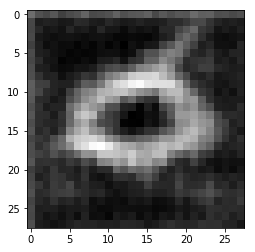

Epoch 3600/2...
==============Losses================
Discriminator: 2.1321
Generator: 0.6686


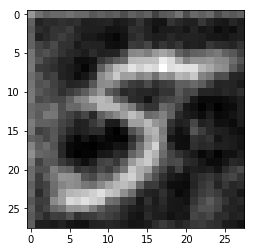

Epoch 3700/2...
==============Losses================
Discriminator: 0.7383
Generator: 1.5185


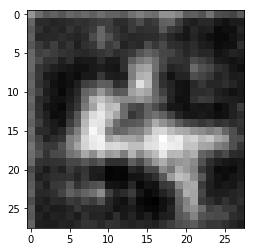

IndexError: list index out of range

In [12]:
batch_size = 32
z_dim = 128
learning_rate = 0.0002
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 100/1...
==============Losses================
Discriminator: 0.6480
Generator: 2.2374


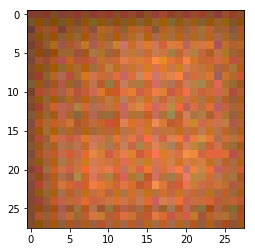

Epoch 200/1...
==============Losses================
Discriminator: 1.5858
Generator: 0.5093


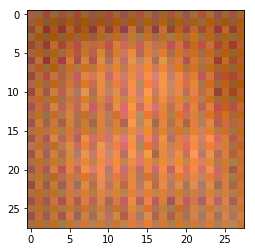

Epoch 300/1...
==============Losses================
Discriminator: 1.2726
Generator: 0.8003


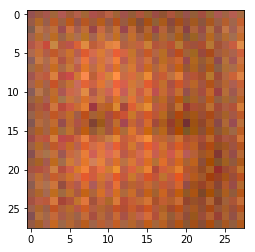

Epoch 400/1...
==============Losses================
Discriminator: 1.2519
Generator: 0.8918


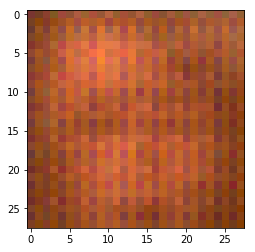

Epoch 500/1...
==============Losses================
Discriminator: 1.2089
Generator: 1.5598


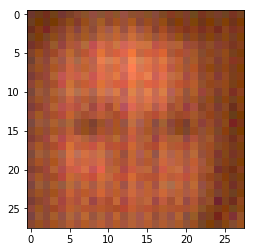

Epoch 600/1...
==============Losses================
Discriminator: 1.2204
Generator: 0.8018


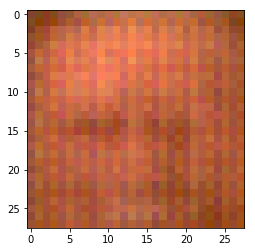

Epoch 700/1...
==============Losses================
Discriminator: 1.1556
Generator: 0.7952


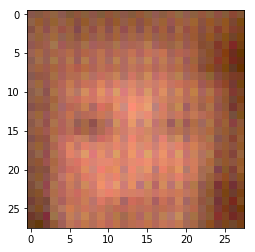

Epoch 800/1...
==============Losses================
Discriminator: 1.2074
Generator: 0.6816


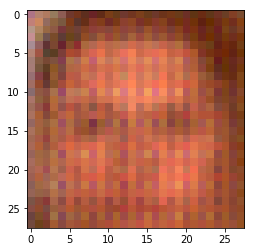

Epoch 900/1...
==============Losses================
Discriminator: 1.4562
Generator: 0.6473


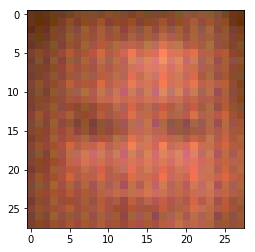

Epoch 1000/1...
==============Losses================
Discriminator: 1.5248
Generator: 1.7922


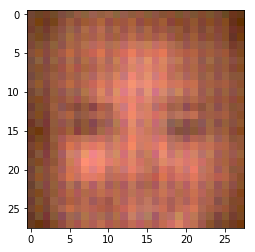

Epoch 1100/1...
==============Losses================
Discriminator: 0.9034
Generator: 1.6422


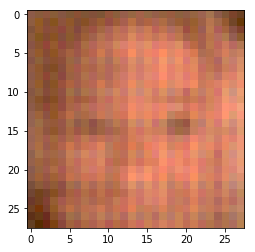

Epoch 1200/1...
==============Losses================
Discriminator: 1.0874
Generator: 0.8737


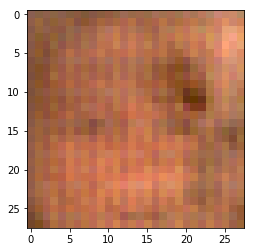

Epoch 1300/1...
==============Losses================
Discriminator: 1.4526
Generator: 0.4956


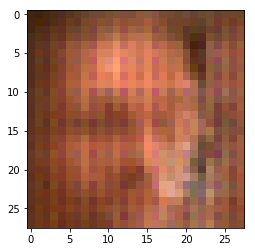

Epoch 1400/1...
==============Losses================
Discriminator: 1.2184
Generator: 0.7384


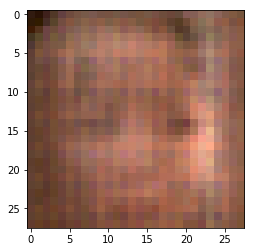

Epoch 1500/1...
==============Losses================
Discriminator: 1.3912
Generator: 0.5348


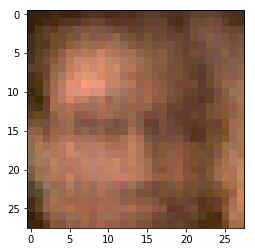

Epoch 1600/1...
==============Losses================
Discriminator: 1.1465
Generator: 1.6647


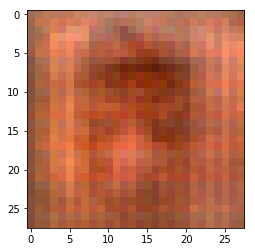

Epoch 1700/1...
==============Losses================
Discriminator: 0.9299
Generator: 1.8098


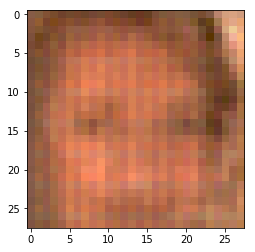

Epoch 1800/1...
==============Losses================
Discriminator: 2.2677
Generator: 0.1872


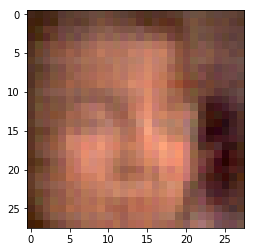

Epoch 1900/1...
==============Losses================
Discriminator: 0.7997
Generator: 1.4481


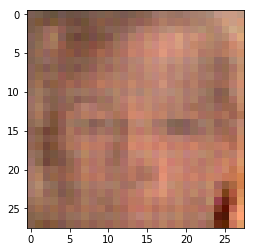

Epoch 2000/1...
==============Losses================
Discriminator: 0.8612
Generator: 1.2012


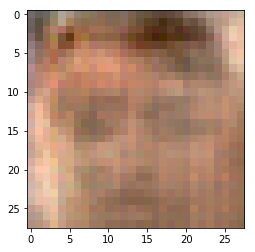

Epoch 2100/1...
==============Losses================
Discriminator: 0.9874
Generator: 0.8693


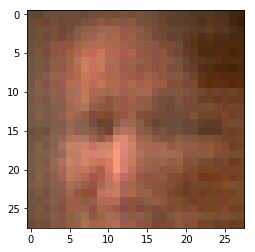

Epoch 2200/1...
==============Losses================
Discriminator: 1.6107
Generator: 0.4135


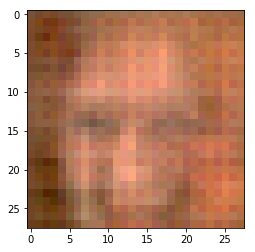

Epoch 2300/1...
==============Losses================
Discriminator: 0.9698
Generator: 0.8889


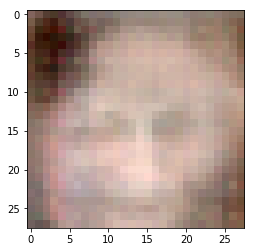

Epoch 2400/1...
==============Losses================
Discriminator: 0.9766
Generator: 2.4276


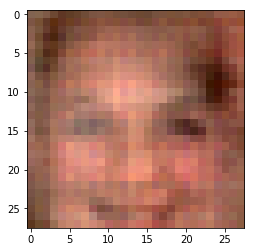

Epoch 2500/1...
==============Losses================
Discriminator: 0.8788
Generator: 2.6459


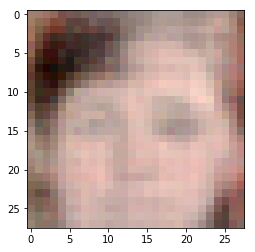

Epoch 2600/1...
==============Losses================
Discriminator: 1.7576
Generator: 0.4127


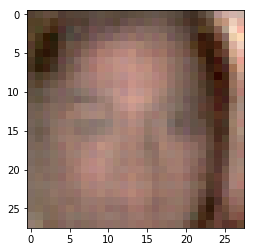

Epoch 2700/1...
==============Losses================
Discriminator: 1.3417
Generator: 0.5550


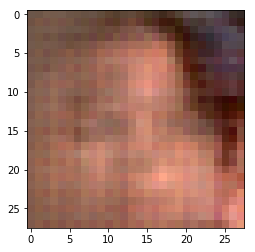

Epoch 2800/1...
==============Losses================
Discriminator: 0.7441
Generator: 1.3813


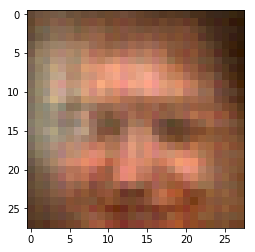

Epoch 2900/1...
==============Losses================
Discriminator: 0.4488
Generator: 3.2073


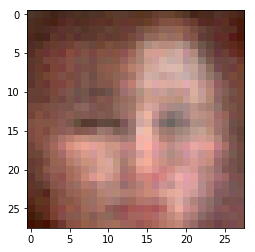

Epoch 3000/1...
==============Losses================
Discriminator: 0.5951
Generator: 1.7197


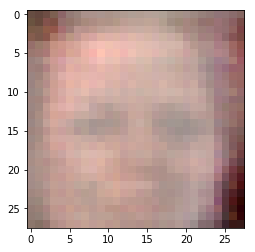

Epoch 3100/1...
==============Losses================
Discriminator: 1.3450
Generator: 0.5594


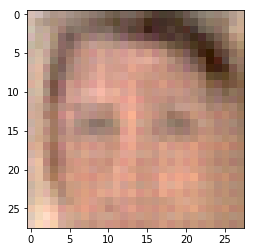

Epoch 3200/1...
==============Losses================
Discriminator: 0.7928
Generator: 2.3406


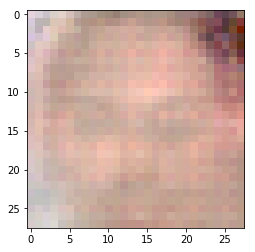

Epoch 3300/1...
==============Losses================
Discriminator: 0.8559
Generator: 1.2115


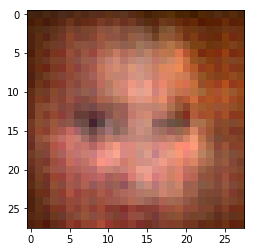

Epoch 3400/1...
==============Losses================
Discriminator: 2.5106
Generator: 3.1134


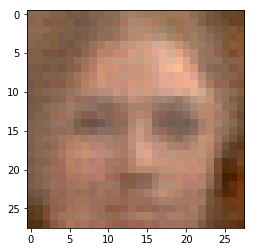

Epoch 3500/1...
==============Losses================
Discriminator: 1.5419
Generator: 0.4638


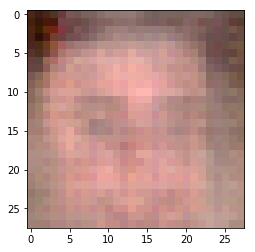

Epoch 3600/1...
==============Losses================
Discriminator: 1.3052
Generator: 0.6070


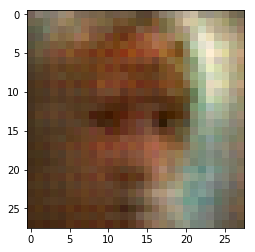

Epoch 3700/1...
==============Losses================
Discriminator: 0.6868
Generator: 3.9104


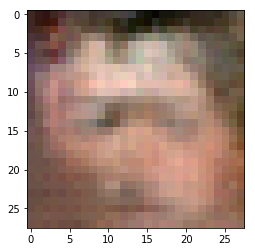

Epoch 3800/1...
==============Losses================
Discriminator: 0.4800
Generator: 2.7018


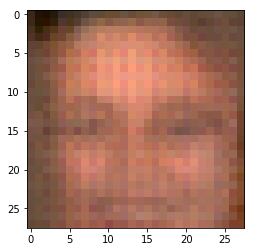

Epoch 3900/1...
==============Losses================
Discriminator: 0.8711
Generator: 1.2202


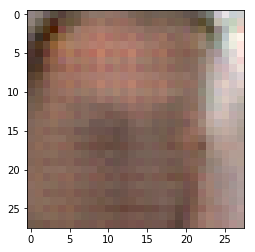

Epoch 4000/1...
==============Losses================
Discriminator: 0.4004
Generator: 3.3799


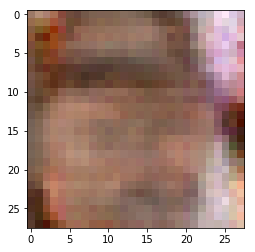

Epoch 4100/1...
==============Losses================
Discriminator: 2.1376
Generator: 4.1253


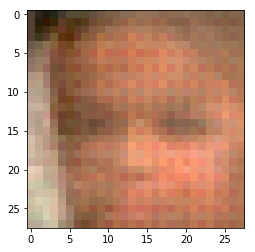

Epoch 4200/1...
==============Losses================
Discriminator: 0.4381
Generator: 3.2304


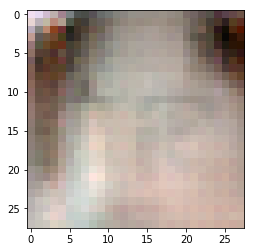

Epoch 4300/1...
==============Losses================
Discriminator: 0.5936
Generator: 1.8554


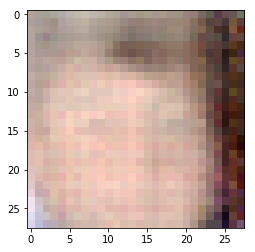

Epoch 4400/1...
==============Losses================
Discriminator: 0.4623
Generator: 2.4801


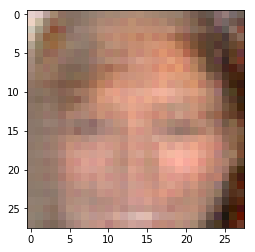

Epoch 4500/1...
==============Losses================
Discriminator: 0.7689
Generator: 2.0888


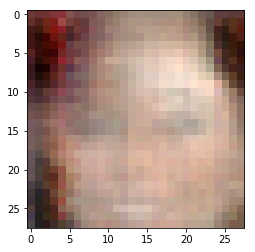

Epoch 4600/1...
==============Losses================
Discriminator: 0.5270
Generator: 2.1672


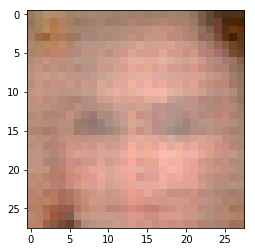

Epoch 4700/1...
==============Losses================
Discriminator: 0.6554
Generator: 1.6120


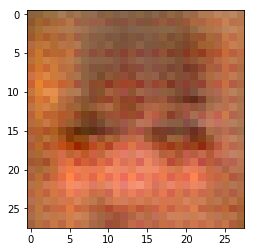

Epoch 4800/1...
==============Losses================
Discriminator: 0.5436
Generator: 2.1249


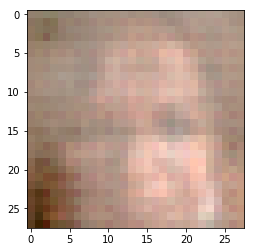

Epoch 4900/1...
==============Losses================
Discriminator: 0.8669
Generator: 1.0899


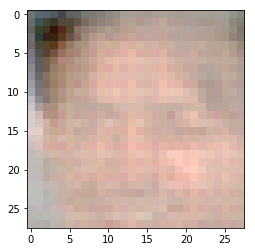

Epoch 5000/1...
==============Losses================
Discriminator: 0.5475
Generator: 2.3769


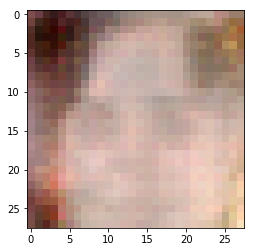

Epoch 5100/1...
==============Losses================
Discriminator: 0.5347
Generator: 1.9802


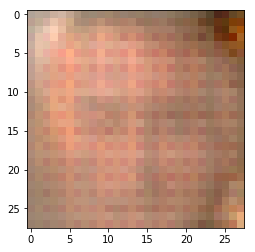

Epoch 5200/1...
==============Losses================
Discriminator: 0.3589
Generator: 4.9354


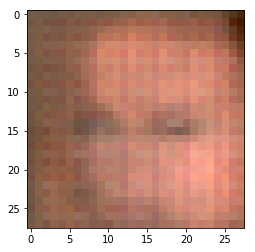

Epoch 5300/1...
==============Losses================
Discriminator: 0.5093
Generator: 2.2410


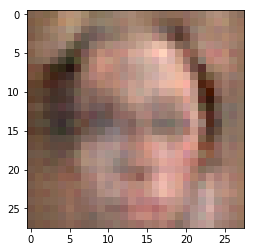

Epoch 5400/1...
==============Losses================
Discriminator: 0.6129
Generator: 1.6664


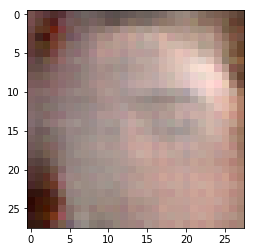

Epoch 5500/1...
==============Losses================
Discriminator: 0.7074
Generator: 1.5368


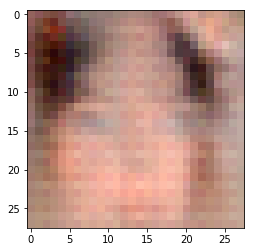

Epoch 5600/1...
==============Losses================
Discriminator: 1.1462
Generator: 0.8134


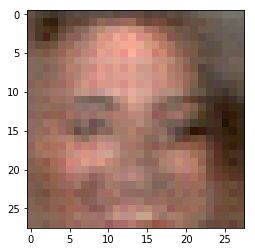

Epoch 5700/1...
==============Losses================
Discriminator: 0.4367
Generator: 2.7907


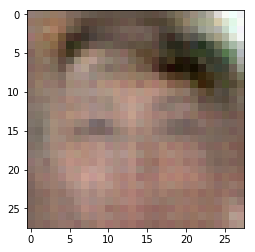

Epoch 5800/1...
==============Losses================
Discriminator: 0.4542
Generator: 2.5737


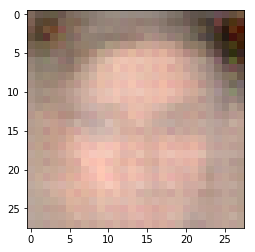

Epoch 5900/1...
==============Losses================
Discriminator: 0.6571
Generator: 1.5460


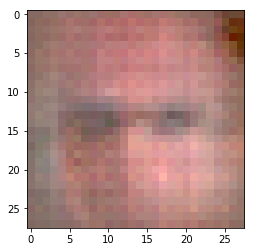

Epoch 6000/1...
==============Losses================
Discriminator: 0.5623
Generator: 1.8897


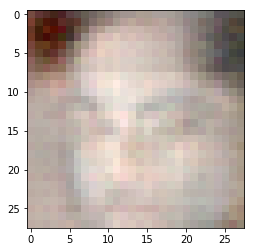

Epoch 6100/1...
==============Losses================
Discriminator: 0.4760
Generator: 2.3495


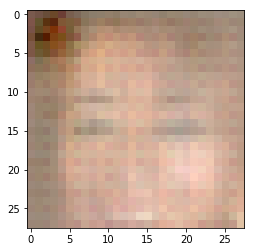

Epoch 6200/1...
==============Losses================
Discriminator: 1.2637
Generator: 4.7538


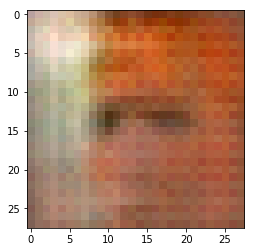

Epoch 6300/1...
==============Losses================
Discriminator: 2.2563
Generator: 0.3839


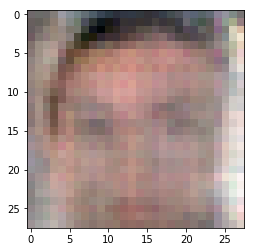

IndexError: list index out of range

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.